# Multiple Linear Regression Practical Implementation

In [1]:
# This will ignore non harmful warnings
from warnings import filterwarnings
filterwarnings("ignore")

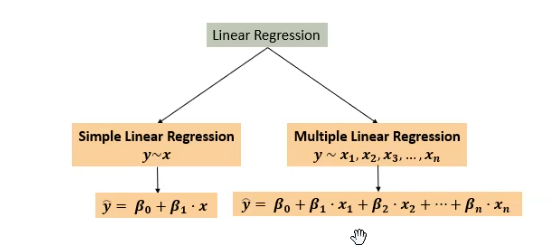

# Step 1 - Data Ingestion (Reading CSV File)

In [2]:
import pandas as pd
df = pd.read_csv("50_Startups.csv")


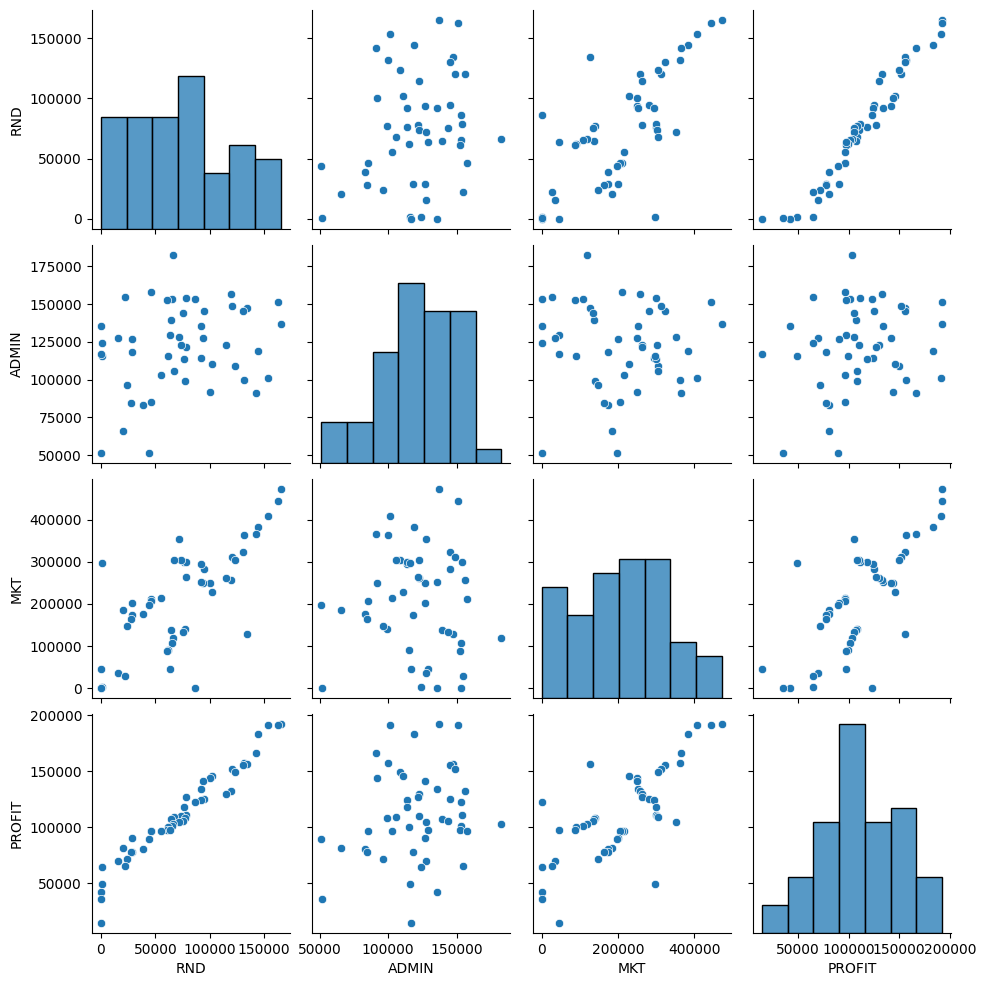

In [3]:
import seaborn as sns
sns.pairplot(df)

# Perform Basic Data Quality Checks

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RND     50 non-null     float64
 1   ADMIN   50 non-null     float64
 2   MKT     50 non-null     float64
 3   STATE   50 non-null     object 
 4   PROFIT  50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
df.isna().sum()

RND       0
ADMIN     0
MKT       0
STATE     0
PROFIT    0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(0)

# Seperate Target and independent Features

In [9]:
X = df[["RND","ADMIN","MKT"]]
Y = df[["PROFIT"]]

In [10]:
X.head()

,RND,ADMIN,MKT
0,165349.20,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42


In [11]:
Y.head()

,PROFIT
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


# Build The model

In [12]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X,Y)

LinearRegression()

In [13]:
model.intercept_

array([50122.19298987])

In [15]:
model.coef_      # As these X has 3 cols, we get three values for coef

array([[ 0.80571505, -0.02681597,  0.02722806]])

### PROFIT_pred = 50122.19 + 0.8057xRND - 0.0268xADMIN + 0.0272xMKT
1. If RND increases by 1 unit profit will increase by 0.8057 units
2. If ADMIN increase by 1 unit profit will decrease by 0.0268 units
3. If MKT increase by 1 unit profit will increase by 0.0272 units

In [16]:
ypred = model.predict(X)
ypred[0:5]

array([[192521.25289008],
       [189156.76823227],
       [182147.2790962 ],
       [173696.70002553],
       [172139.51418327]])

# Model Evaluation

In [18]:
from sklearn.metrics import (
    root_mean_squared_error,
    mean_absolute_error,
    mean_absolute_percentage_error,
    r2_score
)

In [20]:
def evaluate_model(model, x, y):
    # predict the results using the model
    ypred = model.predict(x)
    
    # Calculate all metrics
    rmse = root_mean_squared_error(y, ypred)
    mae = mean_absolute_error(y, ypred)
    mape = mean_absolute_percentage_error(y, ypred)
    r2 = r2_score(y, ypred)

    # Print all above terms
    print(f"RMSE : {rmse:.2f}")
    print(f"MAE : {mae:.2f}")
    print(f"MAPE : {mape:.2%}")
    print(f"R2 : {r2:.2%}")

In [22]:
evaluate_model(model, X, Y)

RMSE : 8855.34
MAE : 6471.45
MAPE : 10.60%
R2 : 95.07%


# Out of sample Prediction

In [23]:
rnd = 1_60_000
admin = 80_000
mkt = 95_000
xnew = [[rnd, admin, mkt]]
pred = model.predict(xnew)
pred

array([[179477.98966088]])

In [24]:
### PROFIT_pred = 50122.19 + 0.8057xRND - 0.0268xADMIN + 0.0272xMKT
50122.19 + 0.8057*1_60_000 - 0.0268*80_000 + 0.0272*95_000

179474.19